<a href="https://colab.research.google.com/github/hiferli/Chur-ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using ANNs 

Part 0 : Importing Libraries

In [116]:
!pip install tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [117]:
print(tf.__version__)

2.11.0


In [118]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Part 1 : Working on the Dataset 

In [119]:
# Link to the Dataset: https://drive.google.com/file/d/1ZRXIpzLhbtBccjauzROH5AuY3aZl7faW/view
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [120]:
# Getting Independant and Dependant Features
X = dataset.iloc[: , 3 : 13]
y = dataset.iloc[: , 13]

In [121]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [122]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [123]:
# Feature Engineering - One Hot Encoding Values... And then removing the first Column (Remaining all = 0 : First Column)
geography = pd.get_dummies(X['Geography'] , drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first = True)

In [124]:
# Dropping previous categorical variables
X = X.drop(['Geography' , 'Gender'] , axis = 1)

In [125]:
# Concatenate these Variables in the Dataframe
X = pd.concat([X , geography , gender] , axis = 1)

In [126]:
# Splitting into Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0);

In [127]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Learn Why: Why is fit_transform applied to training dataset and why is transform applied to testing dataset
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# HINT: Data Leakage

Part 2 : Working on ANN

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU , ELU , PReLU , LeakyReLU
from tensorflow.keras.layers import Dropout

In [129]:
# Initializing ANN
classifier = Sequential();

In [130]:
# Adding the Input Layer
classifier.add(Dense(units = 11 , activation = 'relu'))

In [131]:
# Adding the First Hidden Layer
classifier.add(Dense(units = 7 , activation = 'relu'))

# Adding a Dropout Layer
classifier.add(Dropout(0.2))

In [132]:
# Adding the Second Hidden Layer
classifier.add(Dense(units = 6 , activation = 'relu'))

# Adding a Dropout Layer
classifier.add(Dropout(0.3))

In [133]:
# Adding the Output Layer
classifier.add(Dense(units = 1 , activation = 'sigmoid'))

In [134]:
# OPTIONAL: Adding your own Adam Optimizer with the Learning Rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [135]:
# Compiling all the layers
classifier.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [136]:
# Stop training when a monitored metric has stopped improving

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [137]:
# Fitting the Training Data in the Model
model_history = classifier.fit(X_train , y_train , validation_split = 0.33 , batch_size = 10 , epochs = 1000 , callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 8s 5ms/step - loss: 0.4810 - accuracy: 0.7929 - val_loss: 0.4443 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.4245 - accuracy: 0.8173 - val_loss: 0.3842 - val_accuracy: 0.8470
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3966 - accuracy: 0.8278 - val_loss: 0.3773 - val_accuracy: 0.8485
Epoch 4/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3915 - accuracy: 0.8326 - val_loss: 0.3699 - val_accuracy: 0.8493
Epoch 5/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3921 - accuracy: 0.8322 - val_loss: 0.3896 - val_accuracy: 0.8209
Epoch 6/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3889 - accuracy: 0.8322 - val_loss: 0.3691 - val_accuracy: 0.8512
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3887 - accuracy: 0.8336 - val_loss: 0.3688 - val_accuracy:

In [138]:
# See Model History - Params we have focused on 
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

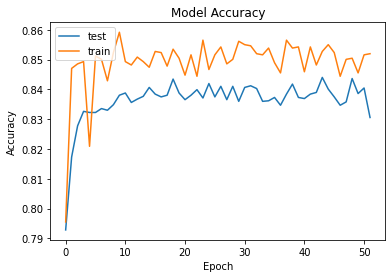

In [139]:
# Plotting Accuracy vs Epochs
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['test' , 'train'] , loc = 'upper left')
plt.show()

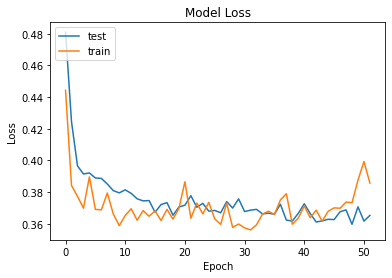

In [140]:
# Plotting Loss vs Epochs
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['test' , 'train'] , loc = 'upper left')
plt.show()

Part 3 : Predicting Values

In [141]:
# Predicting the Prediction Values
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [142]:
# Creating the Confusing Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[1538,   57],
       [ 224,  181]])

In [143]:
# Checking the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , y_pred)
score

0.8595

Additional

In [144]:
# Getting the Weights used by all the ANNs
classifier.get_weights()

[array([[-6.12616181e-01, -3.12108904e-01, -3.50469619e-01,
          1.42286301e+00, -1.17392614e-01,  2.35558704e-01,
          6.09293282e-01,  7.07424060e-02,  3.28863710e-02,
         -7.27337182e-01,  3.91732752e-01],
        [ 1.53529525e+00,  4.80964959e-01,  1.32830846e+00,
         -4.27894205e-01, -1.86037138e-01, -2.04398322e+00,
          2.24353600e+00,  2.02586675e+00, -3.01829624e+00,
         -1.19422048e-01, -1.31511366e+00],
        [ 6.58683002e-01,  1.47584692e-01,  5.44783771e-01,
          1.40481554e-02,  2.21431330e-01,  2.63339728e-01,
          5.00939906e-01, -5.02809703e-01,  4.54052448e-01,
         -8.91346782e-02,  9.92246449e-01],
        [-2.20934853e-01,  5.15867889e-01, -3.01547885e+00,
         -6.86401248e-01, -1.78380311e-01, -1.95365384e-01,
         -1.01188338e+00,  8.56120527e-01, -6.49161637e-01,
         -1.61052370e+00, -2.15450764e+00],
        [ 4.34711993e-01,  4.08431721e+00, -4.19809532e+00,
          3.35407138e-01, -7.77689666e-02, -